<!-- ## Ironhack Kaggle 

### Machine Learning - Predict Sales for Various Stores

### Libraries  -->

# Libraries

In [108]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

<!-- ### Loading the dataset -->

In [120]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/sales.csv")
df.head(10)

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales
0,0,625,3,2013-11-06,641,1,1,0,0,7293
1,1,293,2,2013-07-16,877,1,1,0,1,7060
2,2,39,4,2014-01-23,561,1,1,0,0,4565
3,3,676,4,2013-09-26,1584,1,1,0,0,6380
4,4,709,3,2014-01-22,1477,1,1,0,0,11647
5,5,914,6,2014-10-04,877,1,0,0,0,7967
6,6,1022,3,2013-06-05,789,1,1,0,0,7101
7,8,90,3,2013-02-06,941,1,1,0,0,7516
8,9,860,1,2013-10-21,718,1,1,0,0,6295
9,10,356,4,2014-06-26,317,1,0,0,0,3511


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   True_index           640840 non-null  int64 
 1   Store_ID             640840 non-null  int64 
 2   Day_of_week          640840 non-null  int64 
 3   Date                 640840 non-null  object
 4   Nb_customers_on_day  640840 non-null  int64 
 5   Open                 640840 non-null  int64 
 6   Promotion            640840 non-null  int64 
 7   State_holiday        640840 non-null  object
 8   School_holiday       640840 non-null  int64 
 9   Sales                640840 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 48.9+ MB


In [122]:
df.shape

(640840, 10)

In [112]:
df.isnull().sum()

True_index             0
Store_ID               0
Day_of_week            0
Date                   0
Nb_customers_on_day    0
Open                   0
Promotion              0
State_holiday          0
School_holiday         0
Sales                  0
dtype: int64

<!-- ### Preprocessing -->

In [123]:
# Feature Engineering 
# Converting to date
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year
df["Day"] = df["Date"].dt.day
df["WeekOfYear"] = df["Date"].dt.isocalendar().week
df["Weekday"] = df["Date"].dt.weekday # 0 will be Monday and 6 = Sunday.

### Average Sales by Month

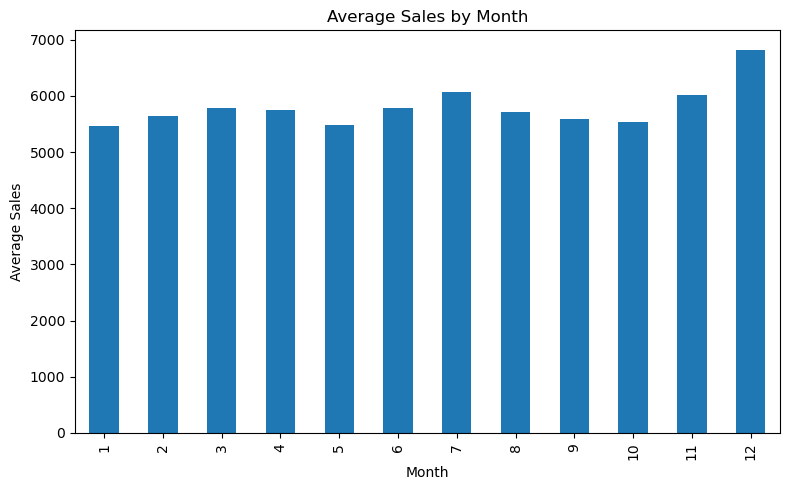

In [124]:
df.groupby("Month")["Sales"].mean().plot(kind="bar", figsize=(8, 5))
plt.title("Average Sales by Month")
plt.ylabel("Average Sales")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

### Average Sales by Day of the Week

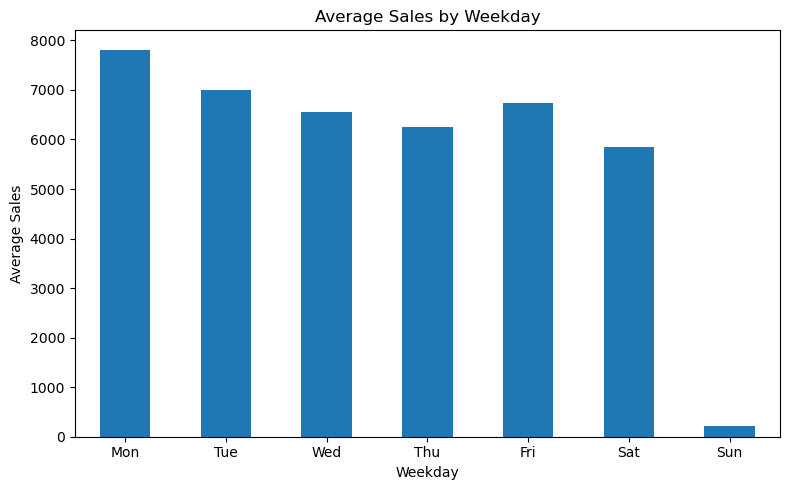

In [125]:
weekday_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df.groupby("Weekday")["Sales"].mean().plot(kind="bar", figsize=(8, 5))
plt.title("Average Sales by Weekday")
plt.ylabel("Average Sales")
plt.xlabel("Weekday")
plt.xticks(ticks=range(7), labels=weekday_names, rotation=0)
plt.tight_layout()
plt.show()


### Sales over Time (Line Plot)

<!-- Now I am going to use dummies -->

In [126]:
# Categorical
df = pd.get_dummies(df, columns=["State_holiday"], drop_first=True)

# Dropping all unnecessary columns
df.drop(columns=["Date"], inplace=True)

<!-- Splitting Features and Target -->

In [127]:
features = df.drop(columns=["Sales"])
target = df["Sales"]

## Train-Test Split

<!-- ### Train-Test Split
Now performing the division between Train and Test, we will reserve 20% of our data to Test -->

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

# Model Selections 
I am trying out different models to review which one predicts the best.

Normalize Features

In [128]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Model Training & Evaluation

In [129]:
models = {
    "RandomForest": RandomForestRegressor(random_state=0),
    "GradientBoosting": GradientBoostingRegressor(random_state=0),
    "KNN": KNeighborsRegressor(n_neighbors=10)}

results = []

for name, model, in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MSE": mse, "RMSE": rmse, "R2": r2 })

# Displaying the results 
results_df = pd.DataFrame(results).sort_values(by="RMSE")
print(results_df)

              Model           MSE         RMSE        R2
0      RandomForest  8.033573e+05   896.301988  0.946073
1  GradientBoosting  1.592257e+06  1261.846752  0.893116
2               KNN  3.198119e+06  1788.328565  0.785319


**Review about the best model**
- Best Model: RandomForestRegressor
1. Here's why: Lowest MSE: It has the smallest average squared error between predicted and true sales.
2. Lowest RMSE: Its prediction errors are closest to zero on average.
3. Highest R²: It explains 94.6% of the variance in the target variable, which is excellent for a regression model.

# Testing the Model

In [140]:
# Best Model 
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

new_test = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/ironkaggle_notarget.csv")

In [137]:
new_test.head(10)

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday
0,7,764,4,2013-12-26,0,0,0,c,1
1,19,22,3,2013-05-22,449,1,0,0,1
2,31,1087,6,2013-06-29,622,1,0,0,0
3,45,139,6,2013-08-17,314,1,0,0,0
4,56,568,1,2014-04-07,356,1,0,0,0
5,57,1056,6,2015-06-20,522,1,0,0,0
6,61,12,3,2014-12-31,609,1,0,0,1
7,63,76,1,2014-06-23,882,1,0,0,0
8,79,605,4,2013-10-17,448,1,0,0,0
9,81,820,6,2013-11-23,996,1,0,0,0


In [141]:
# Same preprocessing as on the test data
new_test["Date"] = pd.to_datetime(new_test["Date"])
new_test["Month"] = new_test["Date"].dt.month
new_test["Year"] = new_test["Date"].dt.year
new_test["Day"] = new_test["Date"].dt.day
new_test["WeekOfYear"] = new_test["Date"].dt.isocalendar().week

In [142]:
new_test = pd.get_dummies(new_test, columns=["State_holiday"], drop_first=True)
new_test = new_test.drop(columns=["Date", "Store_ID"])
new_test = new_test.reindex(columns=x_train.columns, fill_value=0)

In [144]:
new_test_scaled = scaler.transform(new_test)
predictions = best_model.predict(new_test_scaled)

In [145]:
# Exporting the predictions
submission = pd.DataFrame({"Predicted_Sales": predictions})
submission.to_csv("submission.csv", index=False)
print("Predictions saved to submission.csv")

Predictions saved to submission.csv


<!-- ### Testing Model -->

## Visualisations

### Distribution of Sales

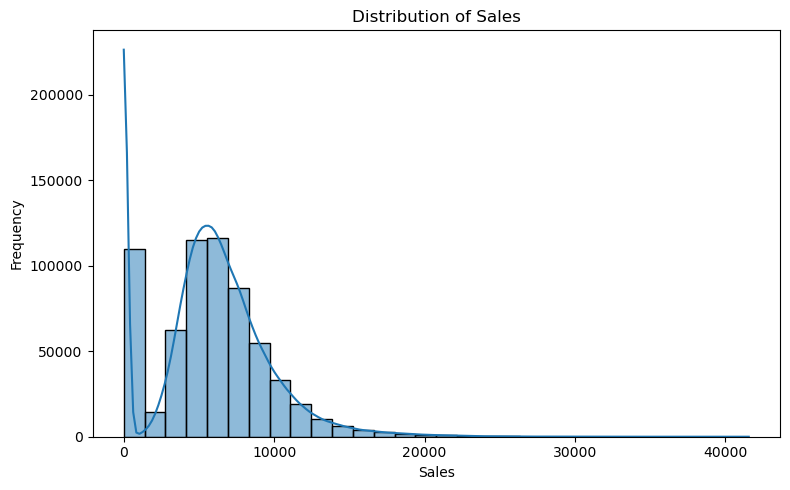

In [146]:
plt.figure(figsize=(8, 5))
sns.histplot(target, bins=30, kde=True)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Sales vs. Number of Customers

/var/folders/rx/4vz0nngn7_q84td2symm90y40000gn/T/ipykernel_6898/1068793468.py:6: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


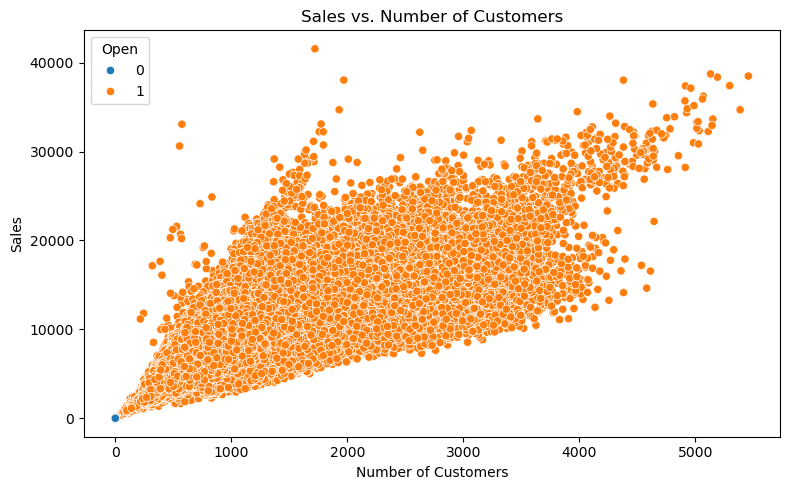

In [147]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=features["Nb_customers_on_day"], y=target, hue=features["Open"])
plt.title("Sales vs. Number of Customers")
plt.xlabel("Number of Customers")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

### Actual vs. Predicted (on the test set)

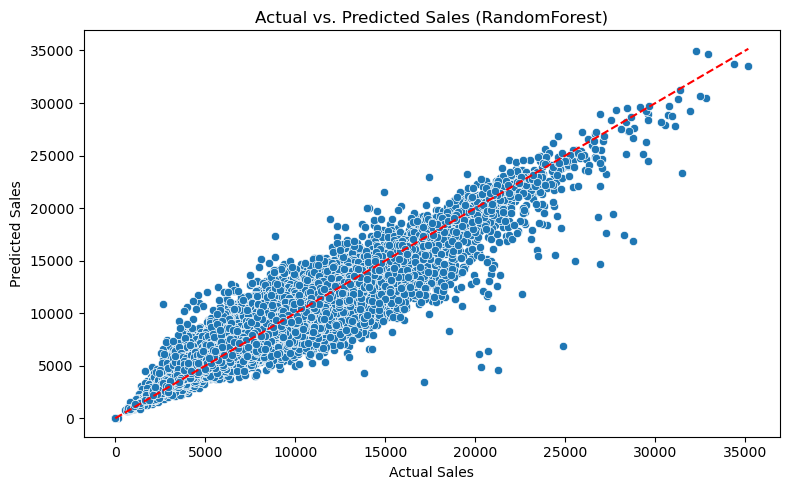

In [148]:
y_pred = best_model.predict(x_test_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title(f"Actual vs. Predicted Sales ({best_model_name})")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.tight_layout()
plt.show()

### Comparing prediction

In [151]:
solution_df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/ironkaggle_solutions.csv")
solution_df

,True_index,Sales
0,7,0.000000
1,19,3792.528564
2,31,5999.958008
3,45,3365.519287
4,56,3458.130127
...,...,...
71200,712004,5714.028320
71201,712018,9701.739258
71202,712020,15175.256836
71203,712023,0.000000


In [154]:
comparison_df = pd.concat([solution_df["Sales"], submission["Predicted_Sales"]], axis=1)
comparison_df.columns = ["Sales", "Predicted_Sales"]

In [155]:
mse = mean_squared_error(comparison_df["Sales"], comparison_df["Predicted_Sales"])
r2 = r2_score(comparison_df["Sales"], comparison_df["Predicted_Sales"])

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2 Score: {r2:.4f}")


Mean Squared Error (MSE): 1296968.94
R2 Score: 0.9068


### Plot Prediction Error

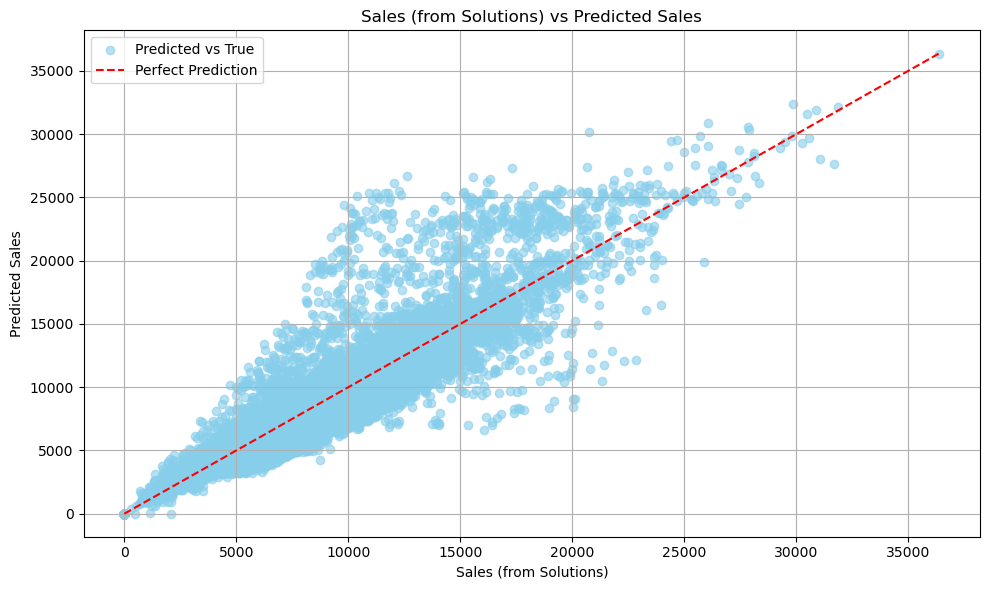

In [162]:
#'comparison_df' dataset contains'Sales' (from the Ironhack Solutions) and 'Predicted_Sales' (Which I created)
plt.figure(figsize=(10, 6))

# Ploting the predicted vs sales (solutions) in skyblue
plt.scatter(comparison_df["Sales"], comparison_df["Predicted_Sales"], 
            color="skyblue", alpha=0.6, label="Predicted vs True")

# Plot perfect prediction line in yellow (gold)
min_val = min(comparison_df["Sales"].min(), comparison_df["Predicted_Sales"].min())
max_val = max(comparison_df["Sales"].max(), comparison_df["Predicted_Sales"].max())
plt.plot([min_val, max_val], [min_val, max_val], 
         color="red", linestyle="--", label="Perfect Prediction")

# Labels and styling
plt.xlabel("Sales (from Solutions)")
plt.ylabel("Predicted Sales")
plt.title("Sales (from Solutions) vs Predicted Sales")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()